# Importing Libraries

In [ ]:
!pip install arxiv

In [ ]:
# Data Collection
import arxiv
import pandas as pd

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # Download stopwords for text preprocessing

# TF-IDF Calculation and Cosine Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Dimensionality Reduction
from sklearn.decomposition import PCA

# K-Means Clustering
from sklearn.cluster import KMeans

# t-SNE for Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Topic Modeling with LDA
from sklearn.decomposition import LatentDirichletAllocation

# Flask Web Application
from flask import Flask, request, jsonify

# Flask for Colab (ngrok integration)
!pip install flask-ngrok  # To expose Flask app to the internet
from flask_ngrok import run_with_ngrok


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing Arxiv Dataset

In [ ]:
import arxiv
import pandas as pd

# Create an arXiv client
client = arxiv.Client()

# Set up search parameters
search_query = "machine learning"
data = {
    'id': [],
    'title': [],
    'summary': [],
    'authors': [],
    'pdf_url': []
}

# Fetch results (paginating by handling it ourselves)
search = arxiv.Search(
    query=search_query,
    max_results=1000,  # Fetch in chunks
    sort_by=arxiv.SortCriterion.SubmittedDate
)

# Loop through the results
for result in client.results(search):
    data['id'].append(result.entry_id.split('/')[-1])
    data['title'].append(result.title)
    data['summary'].append(result.summary)
    data['authors'].append(", ".join([author.name for author in result.authors]))
    data['pdf_url'].append(result.pdf_url)

# Save the results to a CSV
df = pd.DataFrame(data)
df.to_csv('arxiv_data.csv', index=False)
print("Data saved to arxiv_data.csv")


Data saved to arxiv_data.csv


# Exploratory Data Analysis



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('arxiv_data.csv')

Basic Info

In [ ]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1000 non-null   object
 1   title    1000 non-null   object
 2   summary  1000 non-null   object
 3   authors  1000 non-null   object
 4   pdf_url  1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


Checking for Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id         0
title      0
summary    0
authors    0
pdf_url    0
dtype: int64


Quick Summary of Data

In [ ]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                  id                            title  \
count           1000                             1000   
unique          1000                             1000   
top     2411.02050v1  The 2-burning number of a graph   
freq               1                                1   

                                                  summary  \
count                                                1000   
unique                                               1000   
top     We study a discrete-time model for the spread ...   
freq                                                    1   

                                                  authors  \
count                                                1000   
unique                                                995   
top     Anselme Ndikumana, Kim Khoa Nguyen, Mohamed Ch...   
freq                                                    2   

                                  pdf_url  
count                                

Distribution of Authors

In [ ]:
print("\nTop 10 Most Frequent Authors:")
authors_series = df['authors'].str.split(", ").explode()
top_authors = authors_series.value_counts().head(10)
print(top_authors)


Top 10 Most Frequent Authors:
authors
Mikel Abasolo         5
Ibai Coria            5
Anca Dragan           4
Josu Aguirrebeitia    4
J. Wang               4
Wei Wang              4
Sean Kirmani          3
Chao Wang             3
Y. Gao                3
Z. Xu                 3
Name: count, dtype: int64


Plotting top authors

<ipython-input-44-63c8a296cae6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


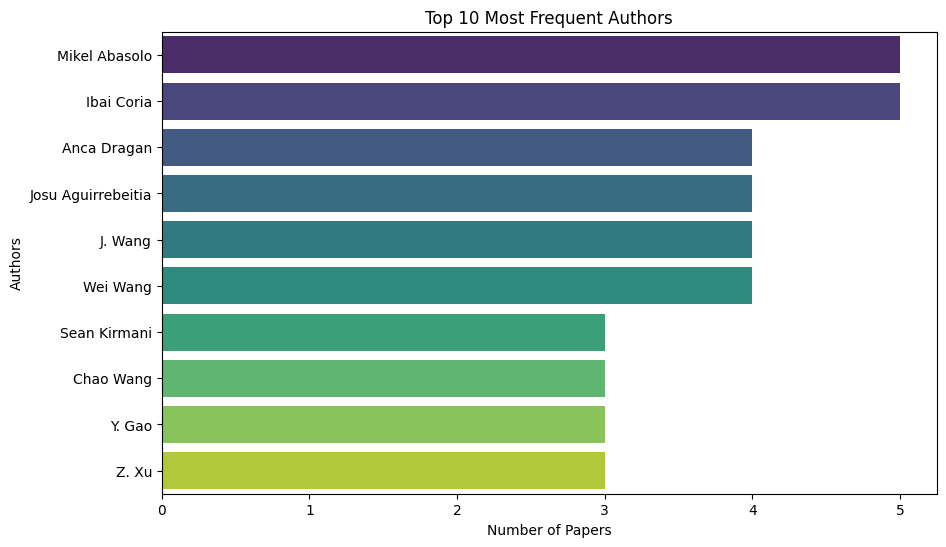

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Papers')
plt.ylabel('Authors')
plt.show()

Summary Length Analysis

In [ ]:
df['summary_length'] = df['summary'].apply(len)

Plotting summary length distribution

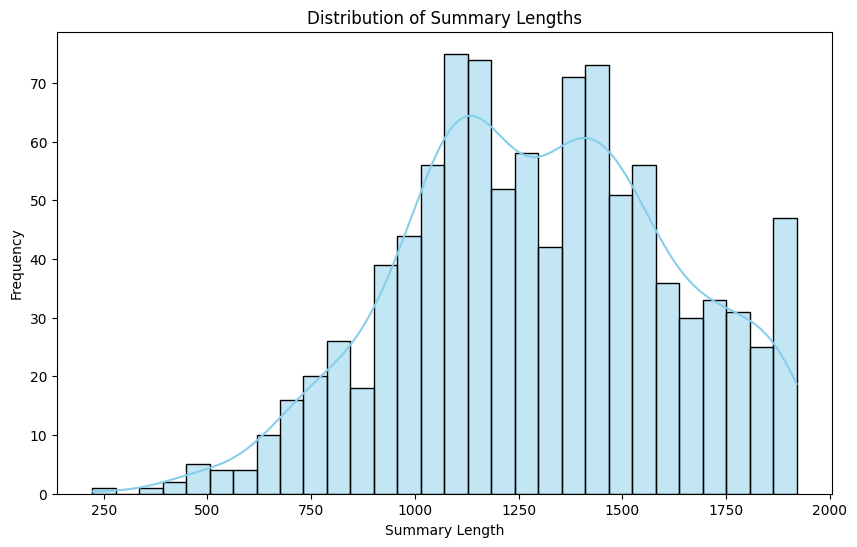

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['summary_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.show()

 Word Cloud of Paper Titles

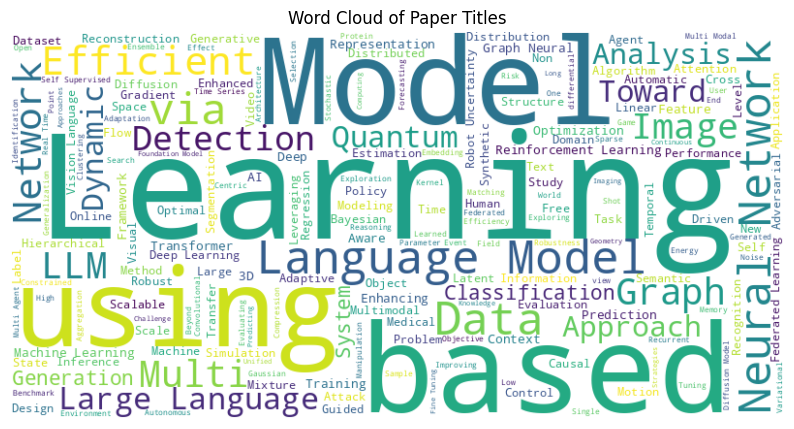

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()

# Combined all the preprocessed text and calculated the Term Frequency-Inverse Document Frequency (TF-IDF) vector for each research paper.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is your DataFrame containing 'title' and 'summary' columns
# Combine the text fields
df['combined_text'] = df['title'] + " " + df['summary']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined text to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# Convert to DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())


TF-IDF matrix shape: (1000, 11670)
   000  0004057  001  002  003  004  005  0068  007  00810  ...  ziv  zknus  \
0  0.0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  ...  0.0    0.0   
1  0.0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  ...  0.0    0.0   
2  0.0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  ...  0.0    0.0   
3  0.0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  ...  0.0    0.0   
4  0.0      0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0    0.0  ...  0.0    0.0   

   zone  zones  zoominfo  zsc  ztf  zulu  zwicky  β_2  
0   0.0    0.0       0.0  0.0  0.0   0.0     0.0  0.0  
1   0.0    0.0       0.0  0.0  0.0   0.0     0.0  0.0  
2   0.0    0.0       0.0  0.0  0.0   0.0     0.0  0.0  
3   0.0    0.0       0.0  0.0  0.0   0.0     0.0  0.0  
4   0.0    0.0       0.0  0.0  0.0   0.0     0.0  0.0  

[5 rows x 11670 columns]


**Interpretation**

**Sparse Matrix:** The TF-IDF matrix is typically sparse, meaning many of its values are zero, reflecting the fact that not all terms appear in every document.

**Dimensionality:** A large number of terms (11,515) indicates a rich vocabulary but can lead to challenges in analysis due to sparsity.

# Used the TF-IDF matrix to calculate cosine similarity between research papers.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

#cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Converting to DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])

# Display the cosine similarity matrix
print(cosine_sim_df)


title                                               Safe Reinforcement Learning of Robot Trajectories in the Presence of Moving Obstacles  \
title                                                                                                                                       
Safe Reinforcement Learning of Robot Trajectori...                                           1.000000                                       
ASL STEM Wiki: Dataset and Benchmark for Interp...                                           0.005581                                       
Using Language Models to Disambiguate Lexical C...                                           0.038207                                       
GazeSearch: Radiology Findings Search Benchmark                                              0.020591                                       
Curriculum Learning for Few-Shot Domain Adaptat...                                           0.022248                                       
...          

Cosine similarity matrix

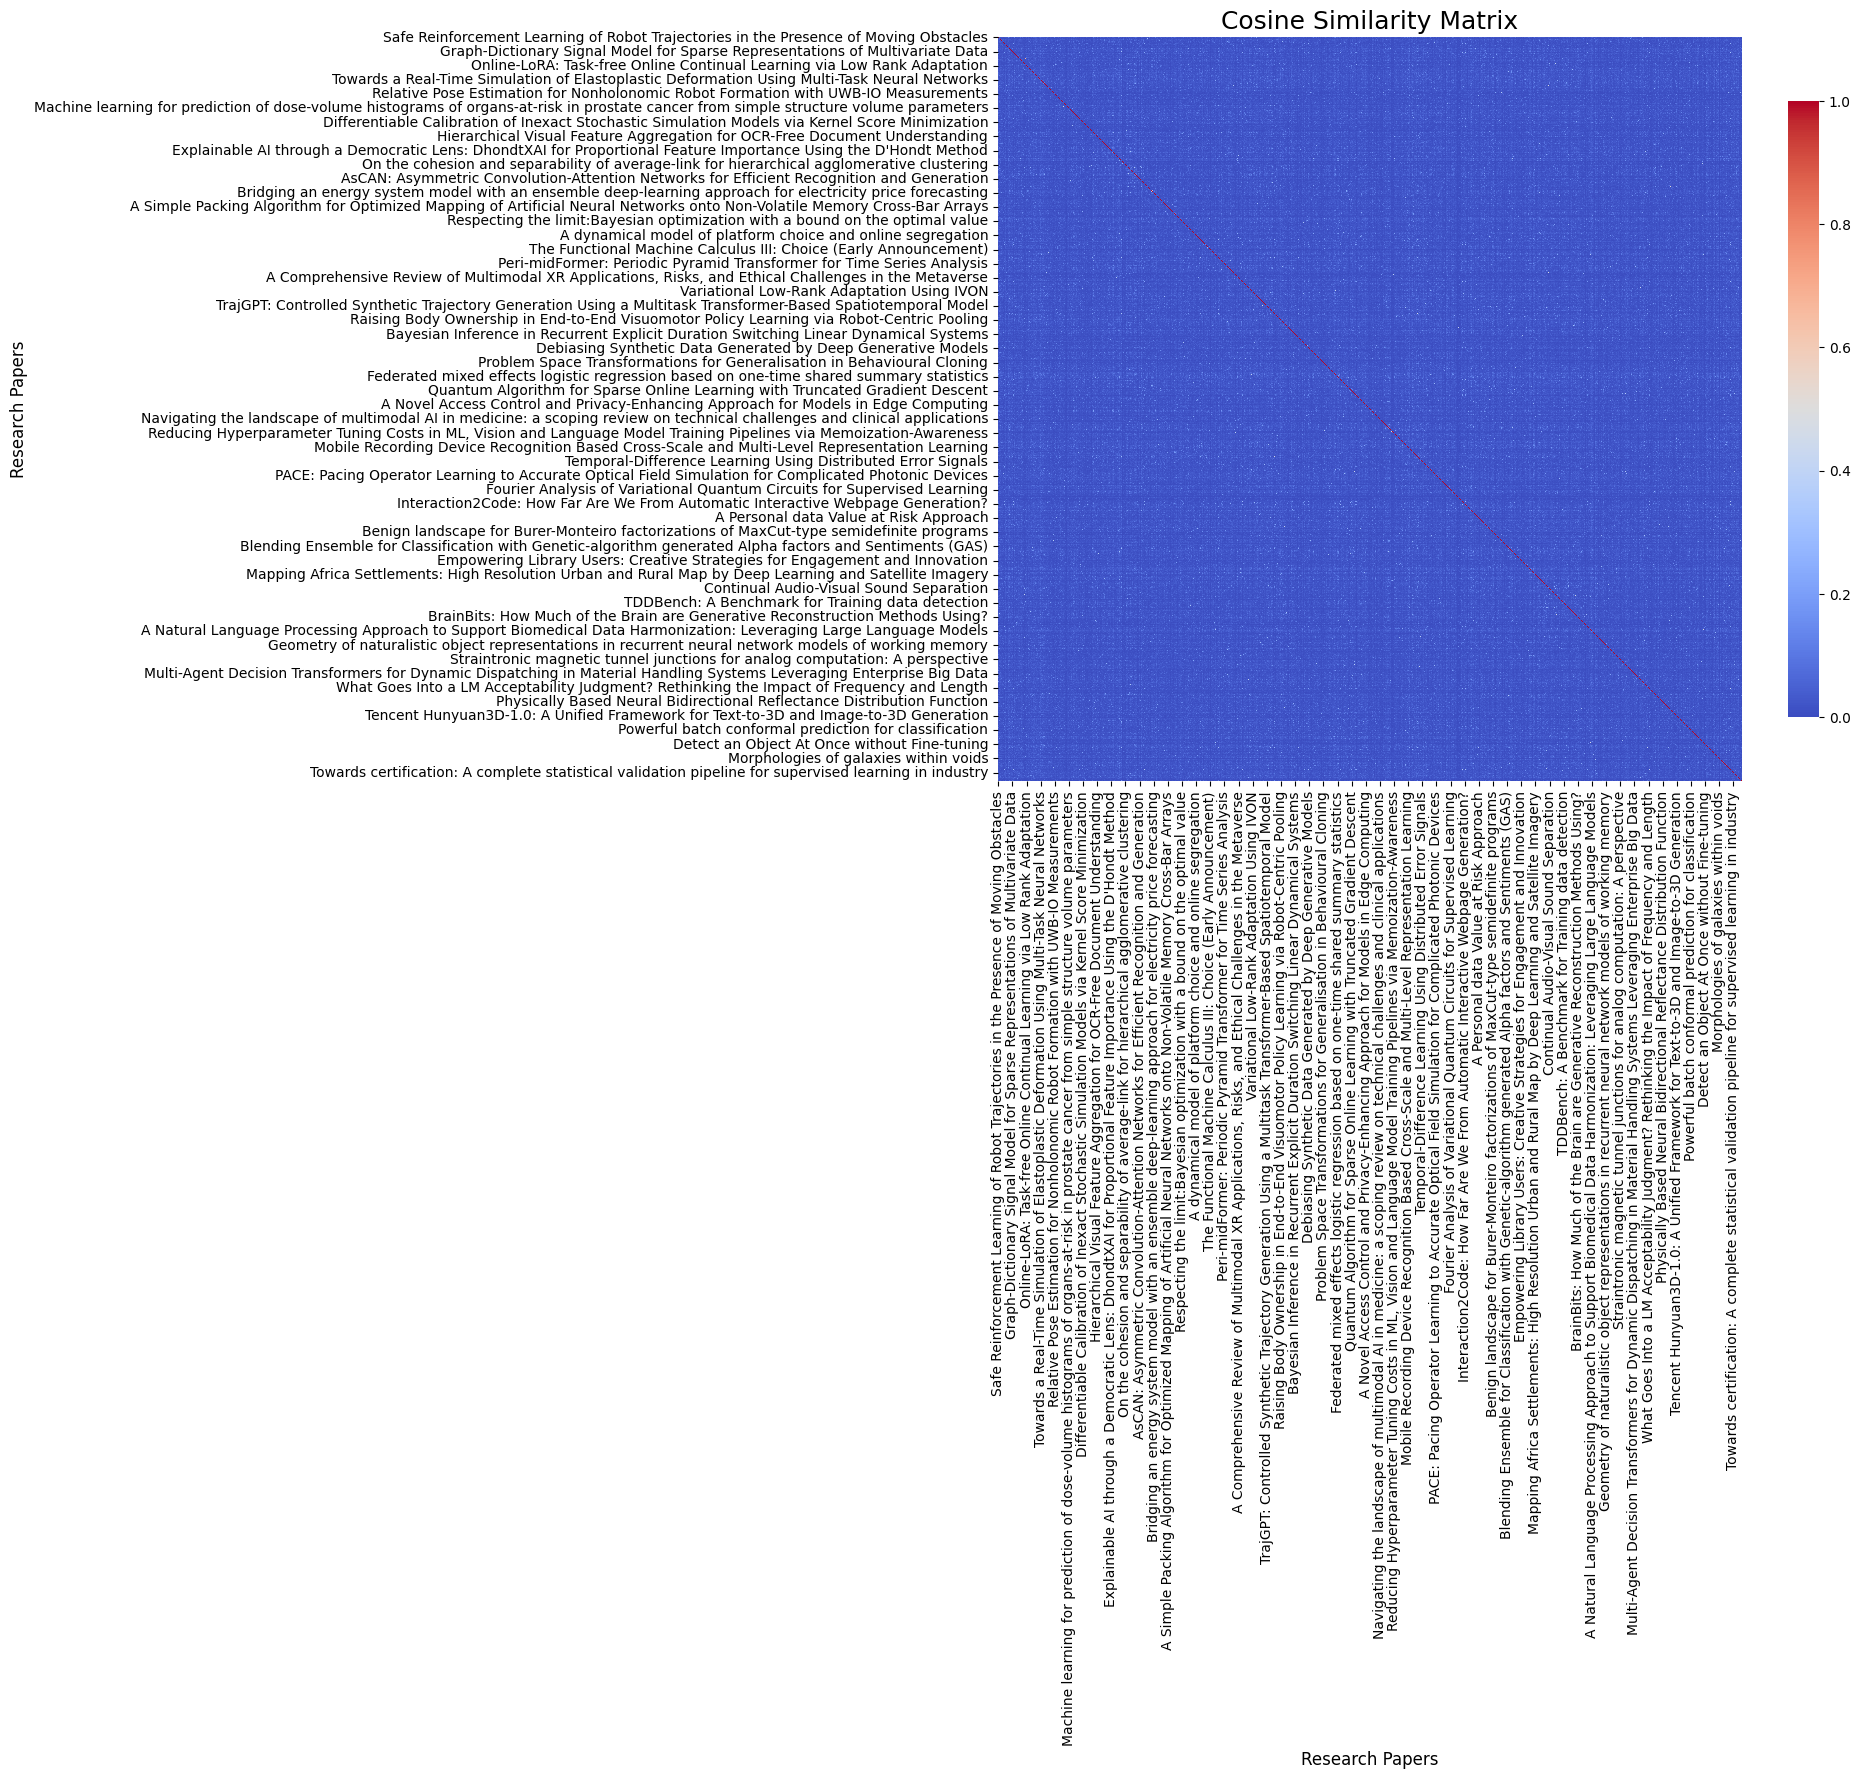

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 10))

# heatmap
sns.heatmap(cosine_sim_df, cmap='coolwarm', annot=False, square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Cosine Similarity Matrix', fontsize=18)
plt.xlabel('Research Papers', fontsize=12)
plt.ylabel('Research Papers', fontsize=12)

# Show the plot
plt.show()


Top-N similar papers for each paper instead of the entire matrix

In [ ]:
# Get the top 5 similar papers for each paper
top_n = 5
top_similarities = cosine_sim_df.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)

# Display the results
for index, similar_papers in enumerate(top_similarities):
    print(f"Paper {index}: Similar Papers {similar_papers}")


Paper 0: Similar Papers ['Safe Reinforcement Learning of Robot Trajectories in the Presence of Moving Obstacles', 'When to Localize? A Risk-Constrained Reinforcement Learning Approach', 'Repairing Neural Networks for Safety in Robotic Systems using Predictive Models', 'Enhancing Risk Assessment in Transformers with Loss-at-Risk Functions', 'An Open-source Sim2Real Approach for Sensor-independent Robot Navigation in a Grid']
Paper 1: Similar Papers ['ASL STEM Wiki: Dataset and Benchmark for Interpreting STEM Articles', 'Stem-OB: Generalizable Visual Imitation Learning with Stem-Like Convergent Observation through Diffusion Inversion', 'Building New Clubhouses: Bridging Refugee and Migrant Women into Technology Design and Production by Leveraging Assets', 'Continuous Sign Language Recognition System using Deep Learning with MediaPipe Holistic', 'Leveraging LLM Tutoring Systems for Non-Native English Speakers in Introductory CS Courses']
Paper 2: Similar Papers ['Using Language Models to 

# Used cosine similarity score to recommend similar research papers for a given research paper.

In [ ]:
import pandas as pd

# Load your arxiv data
papers = pd.read_csv('arxiv_data.csv')

# Assume cosine_sim_df is your cosine similarity DataFrame
# Here, let's just create a sample one for demonstration
import numpy as np

# Replace with your actual cosine similarity DataFrame
cosine_sim_df = pd.DataFrame(np.random.rand(len(papers), len(papers)), columns=papers.index, index=papers.index)

def recommend_similar_papers(paper_index, top_n=5):
    """
    Recommend similar papers based on cosine similarity scores.

    Parameters:
    - paper_index: Index of the paper in the cosine similarity matrix.
    - top_n: Number of similar papers to recommend.

    Returns:
    - DataFrame containing the recommended papers.
    """
    similarity_scores = cosine_sim_df.iloc[paper_index]
    similar_indices = similarity_scores.nlargest(top_n + 1).index[1:]  # Skip the paper itself
    recommended_papers = papers.iloc[similar_indices]
    recommended_papers['similarity_score'] = similarity_scores[similar_indices].values
    return recommended_papers

# Function to take user input and recommend papers
def user_input_recommendation():
    paper_title = input("Enter the title of the paper you want recommendations for: ")

    # Normalize paper title input for better matching
    paper_index = papers[papers['title'].str.contains(paper_title, case=False, na=False)].index

    if not paper_index.empty:
        recommended_papers = recommend_similar_papers(paper_index[0])  # Get recommendations for the first match
        print(recommended_papers[['title', 'similarity_score']])
    else:
        print("No paper found with that title.")

# Example usage
user_input_recommendation()

Enter the title of the paper you want recommendations for: Safe Reinforcement Learning of Robot Trajectories in the Presence of Moving Obstacles
                                                 title  similarity_score
265  Solving Generalized Grouping Problems in Cellu...          0.998721
571  CPEG: Leveraging Consistency Policy with Conse...          0.998701
136  Generating Highly Designable Proteins with Geo...          0.998574
659  MA^2: A Self-Supervised and Motion Augmenting ...          0.996651
384  Gradient Boosting Trees and Large Language Mod...          0.996515


<ipython-input-52-ab5105d60c30>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_papers['similarity_score'] = similarity_scores[similar_indices].values


# Used Principal Component Analysis (PCA) to project down the dimensions of the TF-IDF matrix to several dimensions that will keep a .95 variance

Standardize the TF-IDF Matrix

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(tfidf_matrix.toarray())


Apply PCA

In [ ]:
pca = PCA(0.95)  # Retain 95% variance
pca.fit(scaled_data)

# Transformed data
pca_data = pca.transform(scaled_data)

# Print shape of PCA data
print(f"PCA transformed shape: {pca_data.shape}")


PCA transformed shape: (1000, 886)


Analyze PCA Results

In [ ]:
explained_variance = pca.explained_variance_
print("Explained variance by each component:")
print(explained_variance[:10])  # Print the first 10 components

Explained variance by each component:
[32.33365767 31.64114883 31.33879792 30.90869295 30.22402629 29.33253765
 28.63262529 27.62576711 27.40066422 27.06220261]


Plotting PCA

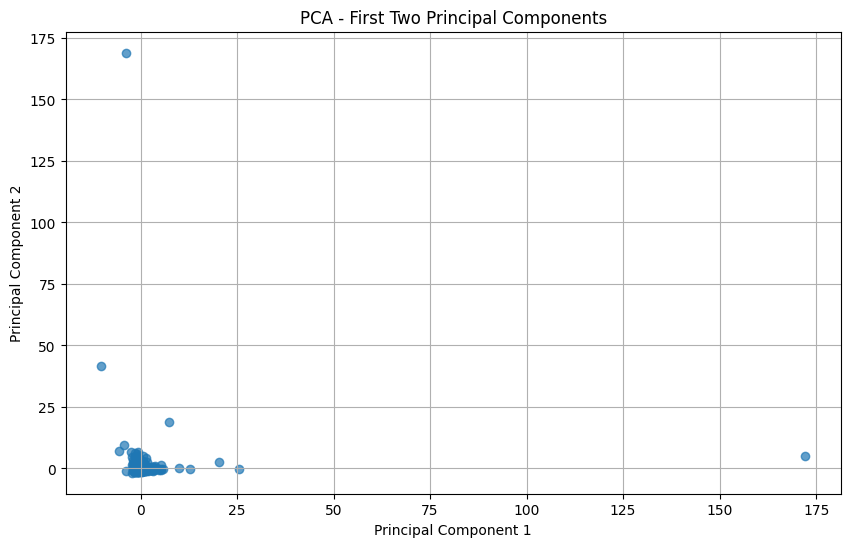

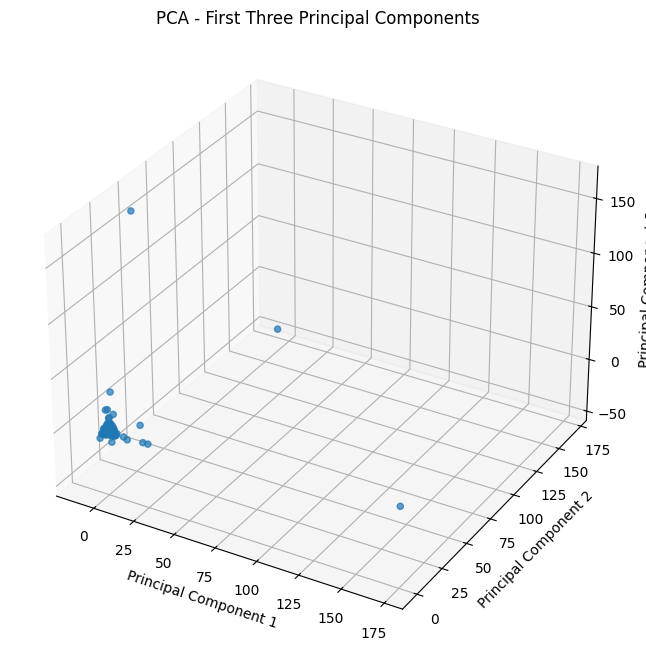

In [ ]:
# For 2D plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# For 3D plot (optional, requires mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.7)
ax.set_title('PCA - First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


# Apply K-Means Clustering on the new data and use these clusters to make recommendations.

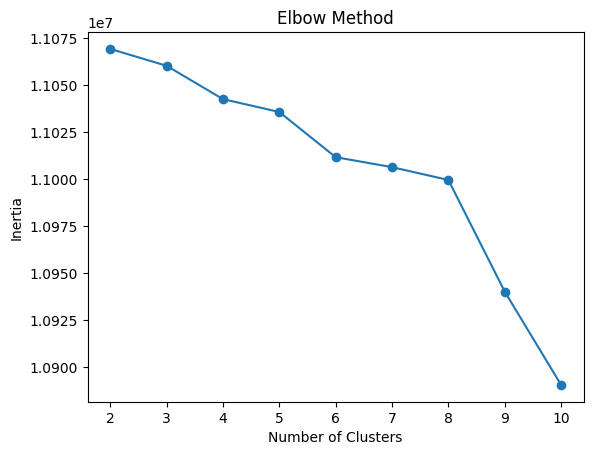

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming `pca_data` is your PCA-reduced dataset
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plotting Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Fit K-Means: After determining the optimal K

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=500, random_state=42)
kmeans.fit(pca_data)


KMeans(n_clusters=500, random_state=42)

Adding Cluster Labels to Data: Appending the cluster labels to original dataset.

In [ ]:
# Get cluster labels
df['cluster_label'] = kmeans.labels_

# Display the updated DataFrame
print(df[['title', 'cluster_label']].head())

                                               title  cluster_label
0  Safe Reinforcement Learning of Robot Trajector...            175
1  ASL STEM Wiki: Dataset and Benchmark for Inter...            241
2  Using Language Models to Disambiguate Lexical ...            175
3    GazeSearch: Radiology Findings Search Benchmark            179
4  Curriculum Learning for Few-Shot Domain Adapta...            329


In [ ]:
def recommend_similar_papers(user_input, papers_df, kmeans_labels):
    # Find the index of the user's input paper
    paper_index = papers_df[papers_df['title'].str.contains(user_input, case=False)].index

    if len(paper_index) == 0:
        print("No paper found with that title. Please try again.")
        return

    # Get the cluster label for the input paper
    cluster_label = kmeans_labels[paper_index[0]]
    print(f"Cluster label for input paper: {cluster_label}")  # Debugging

    # Find papers in the same cluster
    similar_papers = papers_df[kmeans_labels == cluster_label]

    # Exclude the input paper from the recommendations
    similar_papers = similar_papers[similar_papers['id'] != papers_df.iloc[paper_index[0]]['id']]

    # Debugging: Check the number of similar papers found
    print(f"Number of similar papers found: {len(similar_papers)}")

    # Display recommendations
    if not similar_papers.empty:
        print("Recommended papers based on your input:")
        for index, row in similar_papers.iterrows():
            print(f"Title: {row['title']} (ID: {row['id']})")
    else:
        print("No similar papers found.")

# Example usage
user_input = input("Enter the title or a keyword of the research paper: ")
recommend_similar_papers(user_input, df, kmeans.labels_)


Enter the title or a keyword of the research paper: neural network
Cluster label for input paper: 42
Number of similar papers found: 4
Recommended papers based on your input:
Title: Topology-aware Reinforcement Feature Space Reconstruction for Graph Data (ID: 2411.05742v1)
Title: MATI: A GPU-Accelerated Toolbox for Microstructural Diffusion MRI Simulation and Data Fitting with a User-Friendly GUI (ID: 2411.04401v1)
Title: Topograph: An efficient Graph-Based Framework for Strictly Topology Preserving Image Segmentation (ID: 2411.03228v1)
Title: Dynamic Weight Adjusting Deep Q-Networks for Real-Time Environmental Adaptation (ID: 2411.02559v1)


# Apply Dimensionality Reduction to each feature vector using t-Distributed Stochastic Neighbour Embedding (t-SNE) to cluster similar research articles in the two-dimensional plane.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


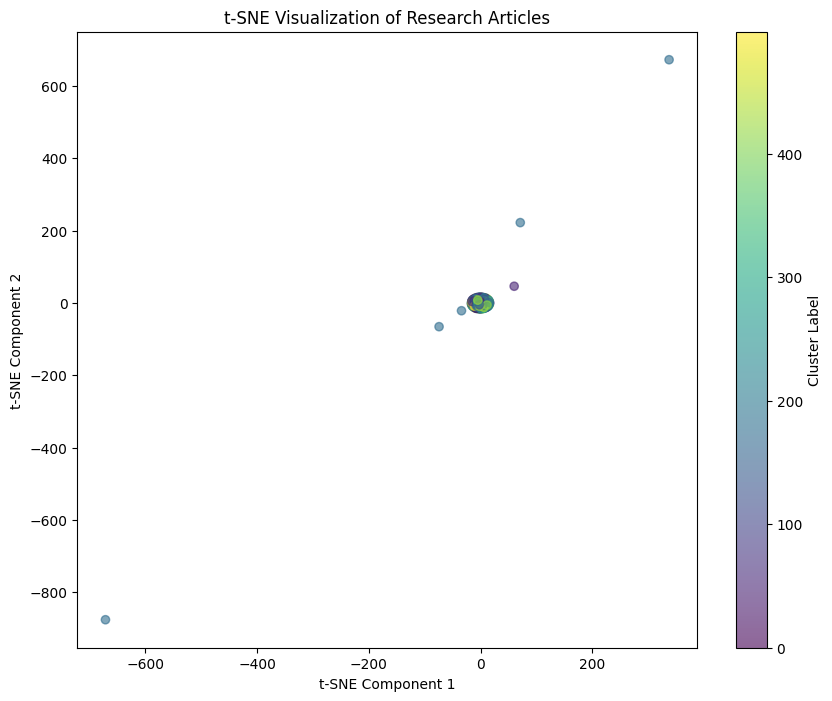

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming `pca_data` is your PCA-transformed data or your TF-IDF matrix
# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(pca_data)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['cluster_label'] = df['cluster_label']  # Use the cluster labels from your previous step

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['x'], tsne_df['y'], c=tsne_df['cluster_label'], cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Research Articles')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


# Apply Topic Modeling on the clustered data using Latent Dirichlet Allocation (LDA) to discover keywords from each cluster.

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

# Assuming 'df' is your DataFrame with 'id', 'title', and 'summary' columns
df['text'] = df['title'] + " " + df['summary']

# Perform K-Means clustering
k = 5  # Number of clusters
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Now you can use df['cluster'] as y_pred
y_pred = df['cluster']

# Prepare for topic modeling
vectorizers = []
topic_df = pd.DataFrame()
topic_df['id'] = df['id']
topic_df['title'] = df['title']
topic_df['text'] = df['text']
topic_df['cluster'] = y_pred

# Create vectorizers for each cluster
for x in range(k):
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english'))

vectorized_data = []
for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(topic_df.loc[topic_df['cluster'] == current_cluster, 'text']))
    except Exception as e:
        print(f"Not enough instances in cluster: {current_cluster}")
        vectorized_data.append(None)

NUM_TOPICS_PER_CLUSTER = 5  # Choose

lda_models = []
for x in range(k):
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online', verbose=False, random_state=42)
    lda_models.append(lda)

clusters_lda_data = []
for current_cluster, lda in enumerate(lda_models):
    if vectorized_data[current_cluster] is not None:
        clusters_lda_data.append(lda.fit_transform(vectorized_data[current_cluster]))

def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
    keywords.sort(key=lambda x: x[1], reverse=True)
    return " ".join([word[0] for word in keywords])

all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    if vectorized_data[current_vectorizer] is not None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

cluster_keyword = {x: all_keywords[x] if x < len(all_keywords) else "No keywords" for x in range(k)}
topic_df['keywords'] = topic_df['cluster'].map(cluster_keyword)

# Dimensionality Reduction to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
two_dim_matrix = tsne.fit_transform(X.toarray())

# Plotting with Plotly
fig = px.scatter(topic_df, x=two_dim_matrix[:, 0], y=two_dim_matrix[:, 1], color='keywords',
                 hover_data=['id', 'title'],
                 height=700, width=1200,
                 title="Clustered Papers")

fig.show()

# Bokeh visualization
colors = Category10[len(topic_df['keywords'].unique())]
p = figure(title='Clustered Papers', width=1600, height=1200)
source = ColumnDataSource(data={
    'x': two_dim_matrix[:, 0],
    'y': two_dim_matrix[:, 1],
    'id': topic_df['id'],
    'title': topic_df['title'],
    'keywords': topic_df['keywords'],
})

p.scatter('x', 'y', source=source, color='keywords', legend_group='keywords', size=10, fill_alpha=0.8, line_alpha=0.8)
hover = HoverTool(tooltips=[('ID', '@id'), ('Title', '@title')])
p.add_tools(hover)
show(p)


Not enough instances in cluster: 0
Not enough instances in cluster: 4
